### IMPORT NECCESARY LIBRARIES

In [1]:
import pandas as pd

### READ YOUR DATASET

In [2]:
data=pd.read_csv('911.csv')

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### EXTRACT DIFFERENT TYPES OF CALL

In [4]:
def title_spliter(x):
    x=x.split(':')
    return x[0]

In [5]:
data['type_of_call']=data['title'].apply(title_spliter)

In [6]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type_of_call
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [7]:
data['type_of_call'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [8]:
type_of_call=data['type_of_call'].value_counts()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set()

In [11]:
from decimal import Decimal

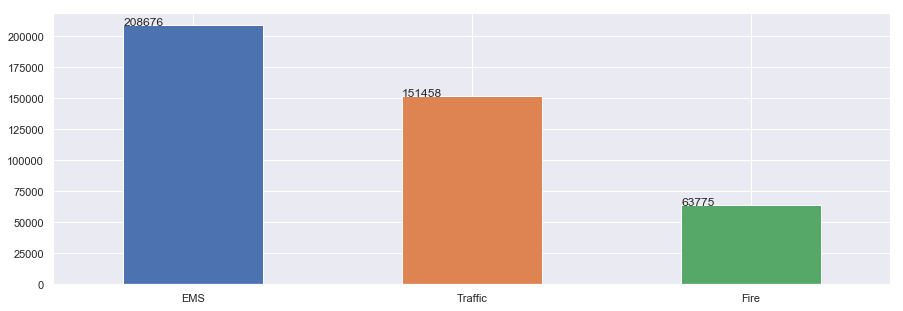

In [15]:
plt.figure(figsize=(15, 5))
ax = type_of_call.plot.bar()
for p in ax.patches:
    ax.annotate(Decimal(str(p.get_height())), (p.get_x(), p.get_height()))
plt.xticks(rotation=0)
plt.savefig('type_of_calls.png')

### ques.2- for extracting date and time

In [16]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'], infer_datetime_format=True)

In [17]:
data['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [18]:
import datetime as dt
data['year'] = data['timeStamp'].dt.year
data['month'] = data['timeStamp'].dt.month_name()
data['day'] = data['timeStamp'].dt.day_name()
data['hour'] = data['timeStamp'].dt.hour

In [19]:
data.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type_of_call,year,month,day,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 14 columns):
lat             423909 non-null float64
lng             423909 non-null float64
desc            423909 non-null object
zip             371780 non-null float64
title           423909 non-null object
timeStamp       423909 non-null datetime64[ns]
twp             423750 non-null object
addr            423909 non-null object
e               423909 non-null int64
type_of_call    423909 non-null object
year            423909 non-null int64
month           423909 non-null object
day             423909 non-null object
hour            423909 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 45.3+ MB


### ques.3- at what time of month i can expect which type of call

In [21]:
month_call=data.groupby(['month','type_of_call'])['type_of_call'].count()

In [22]:
month_call

month      type_of_call
April      EMS             17255
           Fire             4983
           Traffic         11345
August     EMS             17965
           Fire             5717
           Traffic         12290
December   EMS             16131
           Fire             4717
           Traffic         12171
February   EMS             16587
           Fire             4894
           Traffic         11347
January    EMS             18403
           Fire             5637
           Traffic         13784
July       EMS             18096
           Fire             5725
           Traffic         12584
June       EMS             17644
           Fire             5618
           Traffic         12909
March      EMS             17883
           Fire             5752
           Traffic         14031
May        EMS             17819
           Fire             5168
           Traffic         12657
November   EMS             14669
           Fire             4456
           Traffic 

In [23]:
month_call_percentage=month_call.groupby(level=0).apply(lambda x:round(100*x/float(x.sum())))

In [24]:
month_call_percentage

month      type_of_call
April      EMS             51.0
           Fire            15.0
           Traffic         34.0
August     EMS             50.0
           Fire            16.0
           Traffic         34.0
December   EMS             49.0
           Fire            14.0
           Traffic         37.0
February   EMS             51.0
           Fire            15.0
           Traffic         35.0
January    EMS             49.0
           Fire            15.0
           Traffic         36.0
July       EMS             50.0
           Fire            16.0
           Traffic         35.0
June       EMS             49.0
           Fire            16.0
           Traffic         36.0
March      EMS             47.0
           Fire            15.0
           Traffic         37.0
May        EMS             50.0
           Fire            14.0
           Traffic         36.0
November   EMS             46.0
           Fire            14.0
           Traffic         40.0
October    EMS  

In [25]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [26]:
month_call_percentage=month_call_percentage.reindex(month_order,level=0)

In [27]:
month_call_percentage

month      type_of_call
January    EMS             49.0
           Fire            15.0
           Traffic         36.0
February   EMS             51.0
           Fire            15.0
           Traffic         35.0
March      EMS             47.0
           Fire            15.0
           Traffic         37.0
April      EMS             51.0
           Fire            15.0
           Traffic         34.0
May        EMS             50.0
           Fire            14.0
           Traffic         36.0
June       EMS             49.0
           Fire            16.0
           Traffic         36.0
July       EMS             50.0
           Fire            16.0
           Traffic         35.0
August     EMS             50.0
           Fire            16.0
           Traffic         34.0
September  EMS             50.0
           Fire            15.0
           Traffic         35.0
October    EMS             49.0
           Fire            15.0
           Traffic         36.0
November   EMS  

In [28]:
month_call_percentage=month_call_percentage.reindex(['EMS','Traffic','Fire'],level=1)

In [29]:
month_call_percentage

month      type_of_call
January    EMS             49.0
           Traffic         36.0
           Fire            15.0
February   EMS             51.0
           Traffic         35.0
           Fire            15.0
March      EMS             47.0
           Traffic         37.0
           Fire            15.0
April      EMS             51.0
           Traffic         34.0
           Fire            15.0
May        EMS             50.0
           Traffic         36.0
           Fire            14.0
June       EMS             49.0
           Traffic         36.0
           Fire            16.0
July       EMS             50.0
           Traffic         35.0
           Fire            16.0
August     EMS             50.0
           Traffic         34.0
           Fire            16.0
September  EMS             50.0
           Traffic         35.0
           Fire            15.0
October    EMS             49.0
           Traffic         36.0
           Fire            15.0
November   EMS  

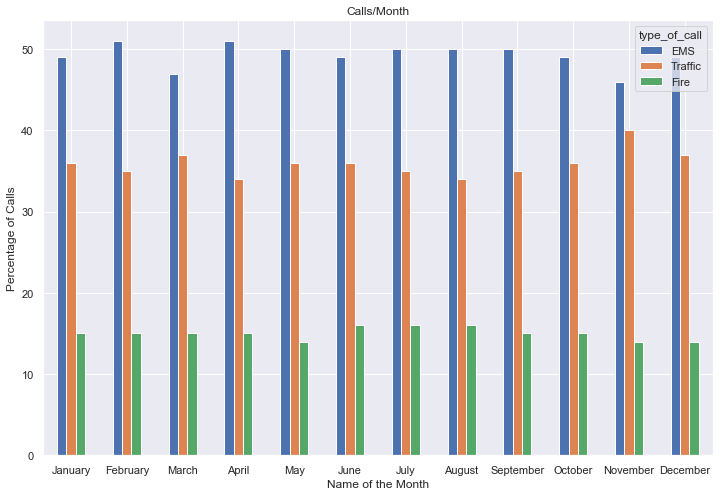

In [30]:
sns.set(rc={'figure.figsize':(12, 8)})
month_call_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the Month')
plt.ylabel('Percentage of Calls')
plt.xticks(rotation=0)
plt.title('Calls/Month')
plt.savefig('month.png')

### ques.3-at what type of call we can extract hours

In [31]:
hours_data = data.groupby(['hour', 'type_of_call'])['type_of_call'].count()

In [32]:
hours_data

hour  type_of_call
0     EMS              5263
      Fire             1341
      Traffic          2046
1     EMS              4711
      Fire             1104
      Traffic          1566
2     EMS              4425
      Fire              981
      Traffic          1390
3     EMS              3956
      Fire              930
      Traffic          1128
4     EMS              3840
      Fire              905
      Traffic          1156
5     EMS              4227
      Fire             1184
      Traffic          1896
6     EMS              5600
      Fire             1557
      Traffic          3967
7     EMS              7629
      Fire             2307
      Traffic          7675
8     EMS              9812
      Fire             2941
      Traffic          8848
9     EMS             11708
      Fire             3266
      Traffic          7741
                      ...  
14    EMS             11763
      Fire             3797
      Traffic         10276
15    EMS             11448
 

In [33]:
hours_call_percentage=hours_data.groupby(level=0).apply(lambda x:round(100*x/float(x.sum())))

In [34]:
hours_call_percentage

hour  type_of_call
0     EMS             61.0
      Fire            16.0
      Traffic         24.0
1     EMS             64.0
      Fire            15.0
      Traffic         21.0
2     EMS             65.0
      Fire            14.0
      Traffic         20.0
3     EMS             66.0
      Fire            15.0
      Traffic         19.0
4     EMS             65.0
      Fire            15.0
      Traffic         20.0
5     EMS             58.0
      Fire            16.0
      Traffic         26.0
6     EMS             50.0
      Fire            14.0
      Traffic         36.0
7     EMS             43.0
      Fire            13.0
      Traffic         44.0
8     EMS             45.0
      Fire            14.0
      Traffic         41.0
9     EMS             52.0
      Fire            14.0
      Traffic         34.0
                      ... 
14    EMS             46.0
      Fire            15.0
      Traffic         40.0
15    EMS             42.0
      Fire            14.0
      Tra

In [35]:
hours_call_percentage=hours_call_percentage.reindex(['EMS','Traffic','Fire'],level=1)

In [36]:
hours_call_percentage

hour  type_of_call
0     EMS             61.0
      Traffic         24.0
      Fire            16.0
1     EMS             64.0
      Traffic         21.0
      Fire            15.0
2     EMS             65.0
      Traffic         20.0
      Fire            14.0
3     EMS             66.0
      Traffic         19.0
      Fire            15.0
4     EMS             65.0
      Traffic         20.0
      Fire            15.0
5     EMS             58.0
      Traffic         26.0
      Fire            16.0
6     EMS             50.0
      Traffic         36.0
      Fire            14.0
7     EMS             43.0
      Traffic         44.0
      Fire            13.0
8     EMS             45.0
      Traffic         41.0
      Fire            14.0
9     EMS             52.0
      Traffic         34.0
      Fire            14.0
                      ... 
14    EMS             46.0
      Traffic         40.0
      Fire            15.0
15    EMS             42.0
      Traffic         44.0
      Fir

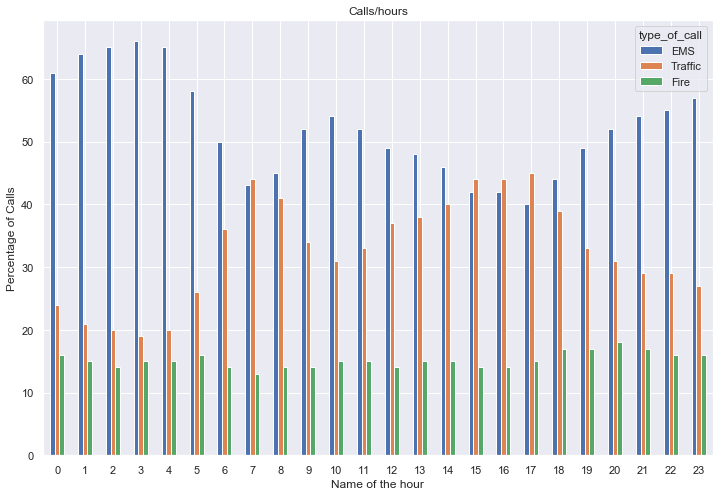

In [37]:
sns.set(rc={'figure.figsize':(12, 8)})
hours_call_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the hour')
plt.ylabel('Percentage of Calls')
plt.xticks(rotation=0)
plt.title('Calls/hours')
plt.savefig('hours.png')

### extract the type_of_emergency_calls

In [38]:
def emergency_separator(x):
    x = x.split(':')
    x = x[1]
    return x



In [39]:
data['emergency_type'] = data['title'].apply(emergency_separator)

In [40]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type_of_call,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,DIZZINESS


In [42]:
data['emergency_type'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' DIZZINESS', ' HEAD INJURY',
       ' NAUSEA/VOMITING', ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' VEHICLE ACCIDENT', ' DISABLED VEHICLE -',
       ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' ALTERED MENTAL STATUS', ' FIRE ALARM',
       ' CVA/STROKE', ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN',
       ' HEMORRHAGING', ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' VEH

In [49]:
emergency_call=data['emergency_type'].value_counts()

In [50]:
emergency_call

 VEHICLE ACCIDENT -              98401
 DISABLED VEHICLE -              31871
 FIRE ALARM                      24459
 VEHICLE ACCIDENT                24081
 FALL VICTIM                     21258
 RESPIRATORY EMERGENCY           21159
 CARDIAC EMERGENCY               20620
 ROAD OBSTRUCTION -              14134
 SUBJECT IN PAIN                 12004
 HEAD INJURY                     11105
 UNKNOWN MEDICAL EMERGENCY        7171
 SYNCOPAL EPISODE                 7087
 GENERAL WEAKNESS                 7070
 SEIZURES                         6946
 ALTERED MENTAL STATUS            6184
 FIRE INVESTIGATION               6036
 MEDICAL ALERT ALARM              6022
 ABDOMINAL PAINS                  5802
 UNCONSCIOUS SUBJECT              5374
 HEMORRHAGING                     5264
 OVERDOSE                         5242
 CVA/STROKE                       5234
 NAUSEA/VOMITING                  4920
 GAS-ODOR/LEAK                    4468
 HAZARDOUS ROAD CONDITIONS -      4395
 CARDIAC ARREST          

In [43]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type_of_call,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,DIZZINESS


In [44]:
data1=data[data['type_of_call']=='EMS']

In [45]:
data1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type_of_call,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,DIZZINESS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015,December,Thursday,15,HEAD INJURY


In [46]:
ems_data=data1['emergency_type'].value_counts().head()

In [47]:
data2=data[data['type_of_call']=='Traffic']

In [48]:
traffic_data=data2['emergency_type'].value_counts().head()

In [49]:
data3=data[data['type_of_call']=='Fire']

In [50]:
fire_data=data3['emergency_type'].value_counts().head()

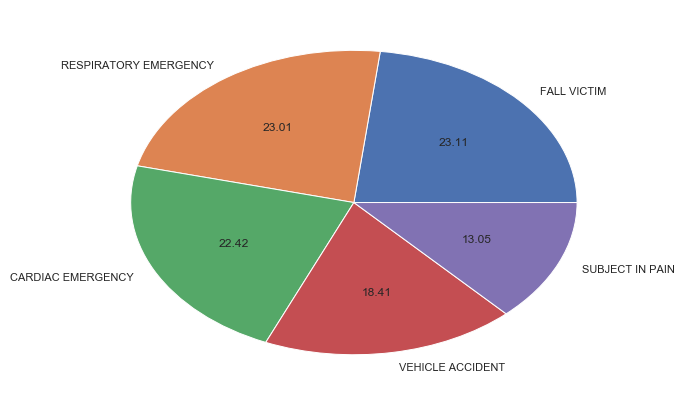

In [51]:
plt.figure(figsize=(10,7))
plt.pie(ems_data.values,labels=ems_data.index,autopct="%.2f")
plt.savefig('EMS_top_5.png')

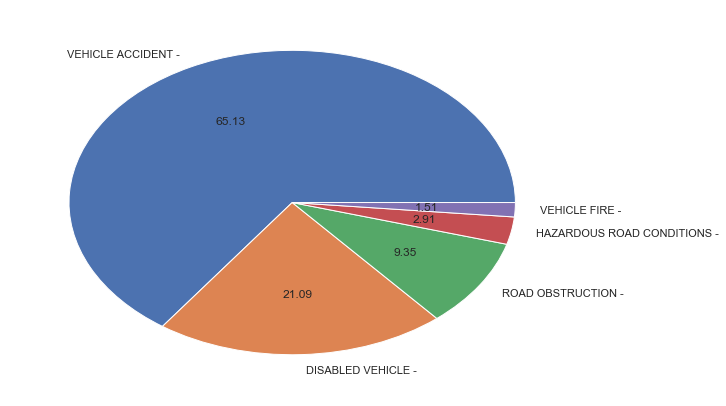

In [62]:
plt.figure(figsize=(10,7))
plt.pie(traffic_data.values,labels=traffic_data.index,autopct="%.2f")
plt.savefig('Traffic_top_5.png')

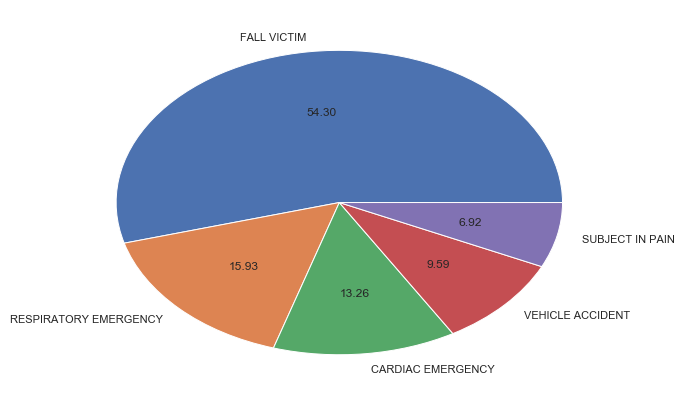

In [52]:
plt.figure(figsize=(10,7))
plt.pie(fire_data.values,labels=ems_data.index,autopct="%.2f")
plt.savefig('Fire_top_5.png')